# Artificial Neural Network

## Definition

Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.
source: IBM

A type of Artificial Neural Network called **Multilayer perceptron (MLP)** is a supplement of feed forward neural network. It consists of three types of layers—the input layer, output layer and hidden layer

### The objective is to:

* Understand the Dataset & decide which part of the data will be used for the model.  
* Use scikit-learn for an Artificial Neural Network called **Multilayer Perceptron**
* Build classification models to predict whether the cancer type is Malignant or Benign
* Evaluate the Model to know its efficiency in making predictions

#### Processes required to achieve the objective

* Data Understanding
* Import necessary libraries
* Data Importation using Pandas to create easily readable dataframe
* Exploration of Data - Checking general data overview using 'describe' and 'info'  
* Data Visualisation
* Feature Selection to decide which section of the data should be included in the model
* Data Preprocessing
* Split Data into Training and Testing
* Data Scaling
* use sklearn to create the MLP Model
* Evaluate the model (Make Predictions)
* Remarks about observation 

## Understanding the Data

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

Some of the Data description is as below:

* diagnosis: diagnosis of breast cancer tissues (M = malignant, B = benign). Benign: tumors arent cancerous. Malignant: tumors are cancerous
* radius_mean: mean of distances from center to points on the perimeter
* texture_mean: standard deviation of gray-scale values
* perimeter_mean: mean size of the core tumor
* area_mean: mean area of the core tumor
* smoothness_mean: mean of local variation in radius lengths

## Initial Libraries Import

In [171]:
import sklearn
import pandas as pd
import numpy as np

In [172]:
df = pd.read_csv('breast-cancer.csv')

In [173]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Exploration

In [174]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### We can see that the data contains 32 columsn and 569 entries

In [176]:
df.isnull().values.any()

False

## Data Visualisation

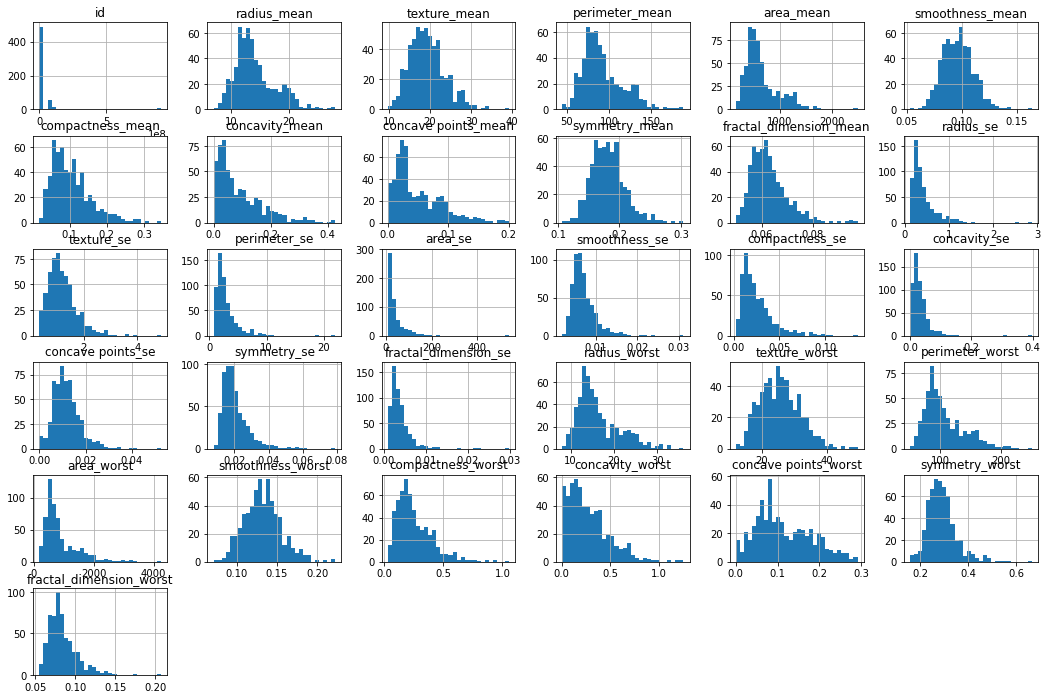

In [177]:
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(18,12))
plt.show()

## Feature Selection

In this case we have decided to use all the data so that we are sure to have captured all the factors that determine a diagnosis. We will therefore not be doing further feature selection processes like multicollinearity checks

## Data Preprocessing before Model creation

We would encode the data and fit it on our dependent variable the diagnosis column which would convert the categorical values to numerical values

In [178]:
## Lets first of all take a look at the values in the diagnosis column before the preprocessing 

df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [179]:
from sklearn import preprocessing

In [180]:
Label = preprocessing.LabelEncoder()

diagnosis = Label.fit_transform(df['diagnosis'])

In [194]:
## lets look at the diagnosis column values after the preprocessing
diagnosis

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

## Training and Testing Data Split

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
train, test = train_test_split(df, random_state=42)

In [183]:
X_train = train[train.columns[2:30]]
y_train = train['diagnosis']
X_test = test[test.columns[2:30]]
y_test = test['diagnosis']

## Data Scaling

We scale the data and after that we apply the scaled data to our trained data i.e x_train and x_test

In [196]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [197]:

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Model Creation

Now we create our Neural Network Model from scikit learn using the Multilayer Perceptron due to the complexity of the data. We use a limited 3 hidden layer size each having 10 neurons and iteration limit of 1000

In [198]:
from sklearn.neural_network import MLPClassifier

In [200]:
MLP = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

## Fitting model to trained Data

Now we fit our model to our trained data

In [202]:
MLP.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

## Predictions

In [189]:
predictions = MLP.predict(X_test)

In [190]:
from sklearn.metrics import classification_report, confusion_matrix

In [191]:
print( confusion_matrix(y_test, predictions))

[[87  2]
 [ 2 52]]


In [192]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           B       0.98      0.98      0.98        89
           M       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



### Remaarks:

We can see that from the 143 observations in our model we have a high accuracy of 97% correctly classified. We can see from our F1-score that out of the 89 Benign observations in our model, 98% were correctly classified. From the 54 Malignant observations 96% are classified accuratels. This is an indication that the processes and our choice of Model is very good